In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_whole = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', index_col=0)

<ipython-input-3-00bcfcd6c8fe>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_whole = pd.read_csv('/content/drive/MyDrive/DSO 574/Assignment 3/Database/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', index_col=0)


In [ ]:
df_whole.shape

(287834, 18)

In [ ]:
df_whole.head(5)

,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [ ]:
# Focus on TV shows
df = df_whole[df_whole['Type'] == 'tv']

# Drop some weird duplicates
df = df.drop_duplicates(subset=df_whole.columns.difference(
                        ['URL', 'Tag', 'IMDB', 'ReelGood' , 'AgeRating', 'Rated',
                         'Released Year', 'Duration Year', 'Seasons', 'What it\'s about',
                         'Where to Watch', 'Rent or Buy Available', 'Exclusive Service',
                         'Has Tag']))

# top 20
top_20 = ['netflix', 'hulu_plus', 'amazon_prime', 'philo', 'fubo_tv', 'tubi_tv', 'hoopla',
 'crunchyroll_free', 'funimation', 'hbo_max', 'plutotv', 'imdb_tv', 'disney_plus',
 'cbs_all_access', 'investigation_discovery_go', 'britbox', 'peacock_free', 'acorntv',
 'plex_free', 'hbo']

top_20_platform_df = df[df['Service'].isin(top_20)]
not_top_20_platform_df = df[~df['Service'].isin(top_20)]

### Genre combination analysis

In [ ]:
# Create genre analysis
# First combine all genre

# Ensure genre is string
df['Genre'] = df['Genre'].astype(str)

columns = ['URL','Title', 'Tag', 'IMDB', 'ReelGood' , 'AgeRating', 'Rated',
                         'Released Year', 'Duration Year', 'Seasons', 'What it\'s about',
                         'Where to Watch', 'Rent or Buy Available', 'Exclusive Service',
                         'Has Tag']

df_genre_combined = df.groupby(columns).agg({'Genre': lambda x: sorted(set(x))}).reset_index()
df_genre_combined

,URL,Title,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag,Genre
0,/show/10-things-i-hate-about-you-2009,10 Things I Hate About You,"['High School', 'Teen', 'High School', 'Teen',...",7.3,69.0,16+,TV-14,2009,2009-2020,1.0,Outspoken Kat Stratford couldn't be less like ...,20 episodes (100%) are available to watch free...,1,0,1,[Comedy]
1,/show/100-miles-from-nowhere-2015,100 Miles From Nowhere,"['Survival', 'Survival']",7.8,40.0,16+,TV-14,2015,2015-2020,1.0,From the producers of Naked and Afraid comes 1...,4 episodes (50%) are available to stream on a ...,1,0,1,"[Documentary, Reality]"
2,/show/100-things-to-do-before-high-school-2015,100 Things to Do Before High School,"['Teen', 'Friendship']",6.1,54.0,all,TV-G,2014,2014-2020,1.0,With real life and teen drama awaiting her aft...,27 episodes (90%) are available to rent or buy...,1,1,1,"[Children, Comedy, Family]"
3,/show/101-ways-to-leave-a-game-show-2011,101 Ways to Leave a Game Show,"['Video Games', 'Video Games', 'Video Games']",7.3,38.0,7+,TV-PG,2011,2011-2020,1.0,Contestants competing match wits in a series o...,8 episodes (100%) are available to watch free ...,1,0,1,[Game Show]
4,/show/112263-2016,11.22.63,"['Based on Books', 'Adaptation', 'Time Travel']",8.2,83.0,18+,TV-MA,2016,2016-2020,1.0,An English teacher travels back in time to pre...,8 episodes (100%) are available to stream on a...,1,0,0,"[Mystery, Science-Fiction, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,/show/zetman-2012,Zetman,['Adaptation'],6.4,55.0,18+,TV-MA,2012,2012-2020,1.0,The story starts off with a face-off between t...,13 episodes (100%) are available to rent or bu...,1,1,1,"[Action & Adventure, Animation, Anime]"
3068,/show/zig-and-sharko-2011,Zig and Sharko,"['Survival', 'Animal', 'Survival', 'Animal', '...",6.8,43.0,all,TV-G,2011,2011-2020,3.0,On a desert island lives a starving hyena with...,52 episodes (28%) are available to watch free ...,0,0,1,"[Action & Adventure, Animation, Comedy, Family]"
3069,/show/zoe-ever-after-2016,Zoe Ever After,['Dating'],4.7,40.0,16+,TV-14,2016,2016-2020,1.0,Zoe Moon a newly single mother mother wants to...,8 episodes (100%) are available to stream on a...,1,0,1,[Comedy]
3070,/show/zoeys-extraordinary-playlist-2020,Zoey's Extraordinary Playlist,"['Technology', 'Music', 'Technology', 'Music',...",8.2,78.0,16+,TV-14,2020,2020-2020,1.0,"After an unusual event, Zoey Clarke, a whip-sm...",12 episodes (100%) are available to watch free...,1,0,1,"[Comedy, Drama, Musical]"


In [ ]:
# Count the frequency of each sorted genre combination
genre_combination_counts = df_genre_combined['Genre'].apply(lambda x: ', '.join(x)).value_counts()

# Calculate the average rating for each genre combination
average_IMDB_by_genre = df_genre_combined.groupby(df_genre_combined['Genre'].apply(lambda x: ', '.join(x)))['IMDB'].mean()

average_RG_by_genre = df_genre_combined.groupby(df_genre_combined['Genre'].apply(lambda x: ', '.join(x)))['ReelGood'].mean()


result_df = pd.DataFrame({'Number of shows': genre_combination_counts, 'IMDB': average_IMDB_by_genre, 'ReelGood': average_RG_by_genre})
result_df

,Number of shows,IMDB,ReelGood
Genre,,,
Action & Adventure,5,7.600000,54.400000
"Action & Adventure, Animation",2,7.000000,62.500000
"Action & Adventure, Animation, Anime",158,7.346203,60.341772
"Action & Adventure, Animation, Anime, Children",1,8.500000,77.000000
"Action & Adventure, Animation, Anime, Comedy",8,6.912500,55.375000
...,...,...,...
Reality,48,6.356250,49.562500
"Reality, Sport",4,6.600000,52.250000
Science-Fiction,1,7.400000,74.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


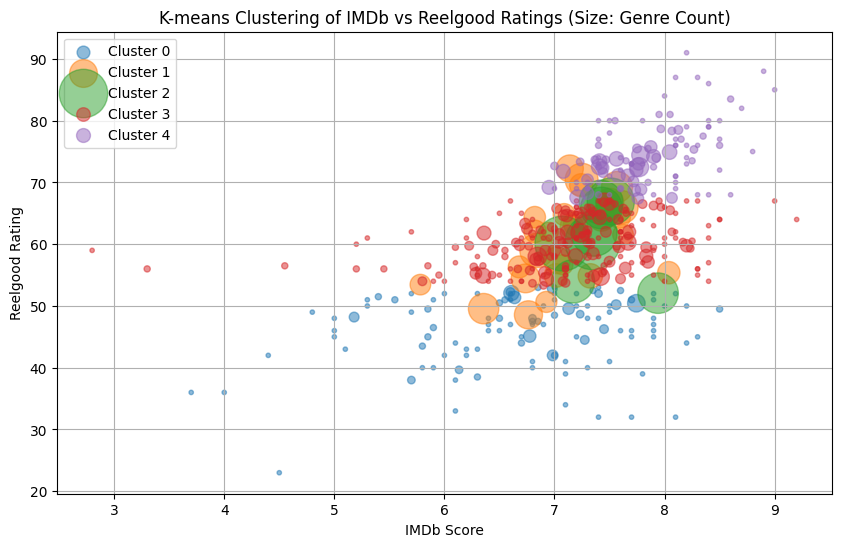

In [ ]:
# Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract data for clustering
data = result_df[['IMDB', 'ReelGood', 'Number of shows']]

# Perform K-means clustering
k = 5  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
result_df['Cluster'] = kmeans.fit_predict(data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data['IMDB'], cluster_data['ReelGood'], s=cluster_data['Number of shows']*10, label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('IMDb Score')
plt.ylabel('Reelgood Rating')
plt.title('K-means Clustering of IMDb vs Reelgood Ratings (Size: Genre Count)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
result_df

,Number of shows,IMDB,ReelGood,Cluster
Genre,,,,
Action & Adventure,5,7.600000,54.400000,3
"Action & Adventure, Animation",2,7.000000,62.500000,3
"Action & Adventure, Animation, Anime",158,7.346203,60.341772,2
"Action & Adventure, Animation, Anime, Children",1,8.500000,77.000000,4
"Action & Adventure, Animation, Anime, Comedy",8,6.912500,55.375000,3
...,...,...,...,...
Reality,48,6.356250,49.562500,1
"Reality, Sport",4,6.600000,52.250000,0
Science-Fiction,1,7.400000,74.000000,4


In [ ]:
result_df[result_df['Cluster'] == 4].describe()

,Number of shows,IMDB,ReelGood,Cluster
count,104.000000,104.000000,104.000000,104.0
mean,3.346154,7.844114,74.412486,4.0
std,3.795166,0.451736,5.117471,0.0
min,1.000000,6.950000,67.428571,4.0
25%,1.000000,7.460000,70.363095,4.0
50%,1.000000,7.792857,73.477273,4.0
75%,4.000000,8.162500,77.000000,4.0
max,19.000000,9.000000,91.000000,4.0


In [ ]:
# Filter: all three metrics should be above average
a = result_df[(result_df['Cluster'] == 4)&(result_df['Number of shows'] >= 3)][['Number of shows', 'IMDB', 'ReelGood']].sort_values(['IMDB', 'ReelGood'], ascending=False)
a[(a['IMDB'] >= 7.79) & (a['ReelGood'] >= 73.47)]

,Number of shows,IMDB,ReelGood
Genre,,,
"Action & Adventure, Biography, Drama",3,8.266667,75.333333
"Drama, LGBTQ",4,8.125000,78.500000
"Comedy, Drama, Horror",3,8.066667,78.333333
"Biography, Crime, Drama",11,8.045455,74.909091
"Comedy, Crime, Mystery",3,7.966667,78.666667
"Action & Adventure, Animation, Children, Science-Fiction",4,7.925000,74.000000
"Comedy, Drama, LGBTQ",10,7.900000,74.200000
"Comedy, Drama, Mystery",8,7.875000,75.750000


In [ ]:
# Show the show in these genre
# Define the desired combinations of genres
desired_combinations = [
    ['Action & Adventure', 'Biography', 'Drama'],
    ['Drama', 'LGBTQ'],
    ['Comedy', 'Drama', 'Horror'],
    ['Biography', 'Crime', 'Drama'],
    ['Comedy', 'Crime', 'Mystery'],
    ['Action & Adventure', 'Animation', 'Children', 'Science-Fiction'],
    ['Comedy', 'Drama', 'LGBTQ'],
    ['Comedy', 'Drama', 'Mystery']
]

# Check if the 'Genre' column for each row exactly matches any of the desired combinations
desired_genre_mask = df_genre_combined['Genre'].apply(lambda x: x in desired_combinations)

# Filter the DataFrame based on the mask
filtered_df = df_genre_combined[desired_genre_mask]

# Display the filtered DataFrame
b = filtered_df[(filtered_df['IMDB'] > 7.79) & (filtered_df['ReelGood'] > 73.47)]
b[['Title','Genre', 'IMDB', 'ReelGood']].sort_values(['ReelGood'], ascending = False)

,Title,Genre,IMDB,ReelGood
1145,House,"[Comedy, Drama, Mystery]",8.7,92.0
2075,Sex Education,"[Comedy, Drama, LGBTQ]",8.3,91.0
1672,Narcos,"[Biography, Crime, Drama]",8.8,90.0
796,Euphoria,"[Drama, LGBTQ]",8.4,87.0
132,American Crime Story,"[Biography, Crime, Drama]",8.4,86.0
2002,Russian Doll,"[Comedy, Drama, Mystery]",7.9,83.0
2209,Star Wars: The Clone Wars,"[Action & Adventure, Animation, Children, Scie...",8.2,83.0
374,Bones,"[Comedy, Crime, Mystery]",7.8,83.0
637,Dead to Me,"[Comedy, Drama, Mystery]",8.0,83.0
2166,Spartacus,"[Action & Adventure, Biography, Drama]",8.5,82.0


### Content difference between top players and small competitors

In [ ]:
# Genre count
top20_genre = top_20_platform_df['Genre'].value_counts(normalize=True)
not_top20_genre = not_top_20_platform_df['Genre'].value_counts(normalize=True)

# pct% diff in genre in top20 and the other platforms
genre_diff = ((not_top20_genre - top20_genre).sort_values(ascending= False))*100
genre_diff

Genre
Reality               3.586856
Comedy                2.519052
Home & Garden         0.520408
Game Show             0.483258
Science-Fiction       0.473053
Food                  0.156470
Musical               0.137797
LGBTQ                 0.088611
Sport                 0.082316
Family                0.081071
Stand-up & Talk       0.075643
Travel                0.000078
Cult                 -0.000559
Biography            -0.031074
Horror               -0.046200
Fantasy              -0.071904
History              -0.207356
Thriller             -0.207468
Documentary          -0.230898
Children             -0.267452
Romance              -0.278299
Action & Adventure   -0.508836
Mystery              -0.551578
Animation            -0.797954
Anime                -1.104764
Drama                -1.862627
Crime                -2.037644
Name: proportion, dtype: float64

In [ ]:
# Compare IMDB ratings of top 20 shows and not top 20's
shows_on_top_20 = top_20_platform_df['Title'].unique()
shows_not_on_top_20 = not_top_20_platform_df[~not_top_20_platform_df['Title'].isin(shows_on_top_20)]

top_20_IMDB = top_20_platform_df.groupby('Genre')['IMDB'].mean()
not_top_20_IMDB = shows_not_on_top_20.groupby('Genre')['IMDB'].mean()

IMDB_diff = (not_top_20_IMDB - top_20_IMDB).sort_values(ascending=False)
IMDB_diff

Genre
Travel                0.337519
Home & Garden         0.169249
Food                  0.160639
History               0.118137
Horror                0.099394
Fantasy               0.029572
Documentary          -0.011498
Stand-up & Talk      -0.027778
Family               -0.051772
Anime                -0.052000
Biography            -0.112162
Children             -0.113942
Mystery              -0.126839
Science-Fiction      -0.143413
Musical              -0.173589
Action & Adventure   -0.194264
Animation            -0.242199
Romance              -0.244871
Drama                -0.269744
Cult                 -0.280000
Crime                -0.293257
Thriller             -0.331865
Reality              -0.348094
Game Show            -0.410644
Comedy               -0.425969
Sport                -0.496240
LGBTQ                -1.363341
Name: IMDB, dtype: float64

In [ ]:
# Compare ReelGood ratings of top 20 shows and not top 20's
top_20_RG = top_20_platform_df.groupby('Genre')['ReelGood'].mean()
not_top_20_RG = shows_not_on_top_20.groupby('Genre')['ReelGood'].mean()

RG_diff = (not_top_20_RG - top_20_RG).sort_values(ascending=False)
RG_diff

Genre
Biography              3.977011
Crime                  1.674176
Travel                 1.592571
History               -0.375977
Children              -0.618166
Fantasy               -0.811036
Romance               -1.533069
Horror                -1.896814
Mystery               -1.915863
Family                -2.216731
Drama                 -2.380735
Action & Adventure    -2.533408
Anime                 -2.707710
Science-Fiction       -2.983993
Animation             -3.195745
Documentary           -3.729138
Cult                  -4.533333
Home & Garden         -4.680832
Thriller              -4.818606
Sport                 -4.902715
Food                  -5.762345
Comedy                -7.164699
Musical               -7.529988
Reality               -7.621105
Stand-up & Talk       -9.530702
Game Show             -9.663057
LGBTQ                -16.451652
Name: ReelGood, dtype: float64

In [ ]:
# Create df

not_top20_over_top20 = pd.DataFrame({'Genre%': genre_diff, 'IMDB': IMDB_diff, 'ReelGood': RG_diff})
not_top20_over_top20

,Genre%,IMDB,ReelGood
Genre,,,
Action & Adventure,-0.508836,-0.194264,-2.533408
Animation,-0.797954,-0.242199,-3.195745
Anime,-1.104764,-0.052000,-2.707710
Biography,-0.031074,-0.112162,3.977011
Children,-0.267452,-0.113942,-0.618166
Comedy,2.519052,-0.425969,-7.164699
Crime,-2.037644,-0.293257,1.674176
Cult,-0.000559,-0.280000,-4.533333
Documentary,-0.230898,-0.011498,-3.729138


In [ ]:
not_top20_over_top20[(not_top20_over_top20['IMDB'] >= 0) & (not_top20_over_top20['ReelGood'] >= 0)]

,Genre%,IMDB,ReelGood
Genre,,,
Travel,0.000078,0.337519,1.592571


### What genre is not that popular but get high ratings

In [ ]:
top20_genre_rating = pd.DataFrame({'Genre%': top20_genre*100, 'IMDB': top_20_IMDB, 'ReelGood': top_20_RG})
top20_genre_rating

,Genre%,IMDB,ReelGood
Genre,,,
Action & Adventure,10.124693,7.083638,56.514576
Animation,9.882603,6.954158,52.594222
Anime,3.770644,7.285333,58.152155
Biography,0.577038,7.550000,51.522989
Children,2.938250,6.659397,49.923251
Comedy,11.321881,7.051770,56.142731
Crime,6.543079,7.369465,54.236936
Cult,0.049745,7.546667,64.866667
Documentary,10.048418,7.215004,43.580168


### Released year analysis

In [ ]:
threshold_year = 2005
top20_recent_show = top_20_platform_df[top_20_platform_df['Released Year'] >= threshold_year]

In [ ]:
# Group the data by year and genre, and count the number of shows in each group
genre_by_year = top20_recent_show.groupby(['Released Year', 'Genre']).size()

# Calculate the total number of shows for each year
total_shows_by_year = top20_recent_show.groupby('Released Year').size()

# Calculate the percentage of each genre by year
percentage_by_year = (genre_by_year / total_shows_by_year).unstack()

In [ ]:
# Assuming 'sorted_percentage_by_year' is your DataFrame with years as rows and genres as columns

# Get the row representing the first year (or any other year you want to use for ordering)
first_year_row = percentage_by_year.loc[percentage_by_year.index[0]]

# Sort the row values to determine the desired order
sorted_genres = first_year_row.sort_values(ascending=False)

# Use the sorted order to reorder the columns of the DataFrame
reordered_df = percentage_by_year[sorted_genres.index]

reordered_df

Genre,Drama,Comedy,Animation,Action & Adventure,Reality,Documentary,Family,Crime,Anime,Science-Fiction,...,History,Sport,Travel,LGBTQ,Home & Garden,Thriller,Musical,Biography,Cult,Stand-up & Talk
Released Year,,,,,,,,,,,,,,,,,,,,,
2005,0.140173,0.112717,0.106936,0.093931,0.085260,0.079480,0.062139,0.049133,0.036127,0.036127,...,0.010116,0.005780,0.005780,0.004335,0.002890,0.002890,0.001445,0.001445,NaN,NaN
2006,0.120850,0.094290,0.136786,0.123506,0.065073,0.069057,0.053121,0.051793,0.061089,0.025232,...,0.003984,0.007968,0.014608,NaN,0.013280,0.010624,NaN,0.002656,NaN,NaN
2007,0.171352,0.096386,0.120482,0.127175,0.076305,0.068273,0.041499,0.049531,0.042838,0.020080,...,0.012048,0.004016,0.008032,NaN,0.009371,0.009371,0.008032,0.001339,NaN,NaN
2008,0.126675,0.068210,0.107186,0.136419,0.101096,0.121803,0.035323,0.049939,0.045067,0.023143,...,0.019488,0.002436,0.009744,0.002436,0.006090,0.004872,0.002436,0.008526,NaN,NaN
2009,0.127451,0.145969,0.081699,0.087146,0.119826,0.117647,0.039216,0.032680,0.029412,0.020697,...,0.011983,0.010893,NaN,0.009804,0.013072,0.005447,0.004357,0.004357,NaN,0.001089
2010,0.117002,0.095978,0.090494,0.082267,0.133455,0.142596,0.031079,0.058501,0.030165,0.010055,...,0.020110,0.005484,0.008227,0.002742,0.014625,0.007313,0.001828,0.003656,NaN,NaN
2011,0.140986,0.107858,0.093991,0.094761,0.116333,0.105547,0.033898,0.067797,0.041602,0.013097,...,0.011556,0.003082,0.002311,0.001541,0.016949,0.021572,0.001541,0.004622,NaN,0.002311
2012,0.105619,0.085308,0.096818,0.092756,0.142180,0.163169,0.031821,0.050779,0.044008,0.014895,...,0.012864,0.006770,0.012187,0.002708,0.020988,0.008802,0.003385,0.010833,NaN,0.000677
2013,0.113846,0.112615,0.096000,0.091692,0.108923,0.108923,0.046769,0.065231,0.034462,0.010462,...,0.010462,0.010462,0.010462,0.004308,0.019692,0.014769,0.000615,0.007385,NaN,0.001846


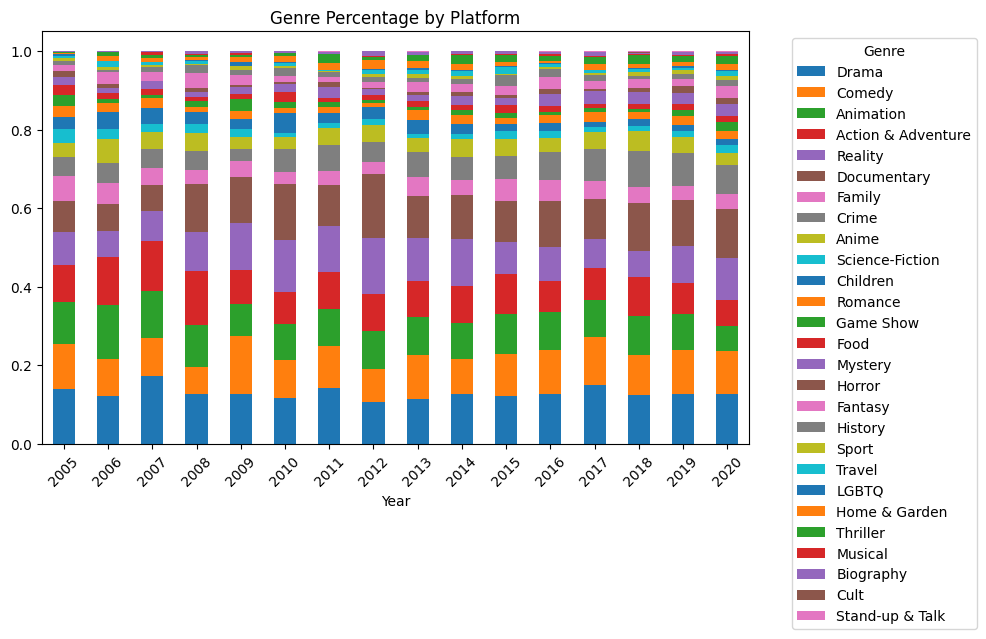

In [ ]:
# Plotting the genre percentages by platform
reordered_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Genre Percentage by Platform')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The genre percentage seems to be stable for years in top 20 platform

In [ ]:
threshold_year = 2005
not_top20_recent_show = not_top_20_platform_df[not_top_20_platform_df['Released Year'] >= threshold_year]

In [ ]:
# Group the data by year and genre, and count the number of shows in each group
genre_by_year = not_top20_recent_show.groupby(['Released Year', 'Genre']).size()

# Calculate the total number of shows for each year
total_shows_by_year = not_top20_recent_show.groupby('Released Year').size()

# Calculate the percentage of each genre by year
percentage_by_year = (genre_by_year / total_shows_by_year).unstack()

In [ ]:
# Assuming 'sorted_percentage_by_year' is your DataFrame with years as rows and genres as columns

# Get the row representing the first year (or any other year you want to use for ordering)
first_year_row = percentage_by_year.loc[percentage_by_year.index[0]]

# Sort the row values to determine the desired order
sorted_genres = first_year_row.sort_values(ascending=False)

# Use the sorted order to reorder the columns of the DataFrame
reordered_df = percentage_by_year[sorted_genres.index]

reordered_df

Genre,Comedy,Drama,Reality,Animation,Documentary,Action & Adventure,Family,Mystery,Crime,Game Show,...,Sport,Musical,History,LGBTQ,Thriller,Travel,Home & Garden,Biography,Cult,Stand-up & Talk
Released Year,,,,,,,,,,,,,,,,,,,,,
2005,0.141988,0.125761,0.119675,0.095335,0.085193,0.073022,0.050710,0.034483,0.032454,0.032454,...,0.012170,0.012170,0.010142,0.006085,0.006085,0.004057,0.002028,NaN,NaN,NaN
2006,0.133094,0.134892,0.120504,0.086331,0.093525,0.082734,0.044964,0.017986,0.043165,0.017986,...,0.017986,NaN,0.001799,NaN,0.005396,0.014388,0.010791,0.005396,NaN,0.001799
2007,0.148773,0.136503,0.113497,0.098160,0.075153,0.087423,0.052147,0.018405,0.042945,0.004601,...,0.006135,0.010736,0.013804,0.004601,0.007669,0.016871,0.016871,0.003067,NaN,NaN
2008,0.098284,0.127925,0.152886,0.074883,0.140406,0.096724,0.032761,0.014041,0.034321,0.029641,...,0.001560,0.003120,0.018721,0.006240,0.004680,0.015601,0.012480,0.004680,NaN,NaN
2009,0.132836,0.097015,0.153731,0.074627,0.132836,0.089552,0.049254,0.014925,0.029851,0.026866,...,0.011940,0.001493,0.011940,0.002985,0.007463,0.001493,0.023881,0.002985,NaN,0.001493
2010,0.125448,0.100358,0.179211,0.063321,0.118280,0.082437,0.027479,0.022700,0.031063,0.023895,...,0.015532,NaN,0.022700,0.002389,0.011947,0.009558,0.027479,0.003584,NaN,0.002389
2011,0.142725,0.113994,0.168675,0.078777,0.102873,0.076923,0.027804,0.024096,0.049120,0.019462,...,0.002780,0.000927,0.011121,0.005561,0.012048,0.003707,0.026877,0.007414,NaN,0.001854
2012,0.125862,0.105172,0.190517,0.074138,0.135345,0.084483,0.031034,0.016379,0.027586,0.014655,...,0.004310,0.005172,0.008621,0.003448,0.006034,0.010345,0.024138,0.009483,NaN,0.002586
2013,0.137480,0.090016,0.165303,0.079378,0.108838,0.093290,0.036825,0.007365,0.040917,0.019640,...,0.009820,0.000818,0.008183,0.003273,0.016367,0.009820,0.029460,0.004910,0.000818,0.002455


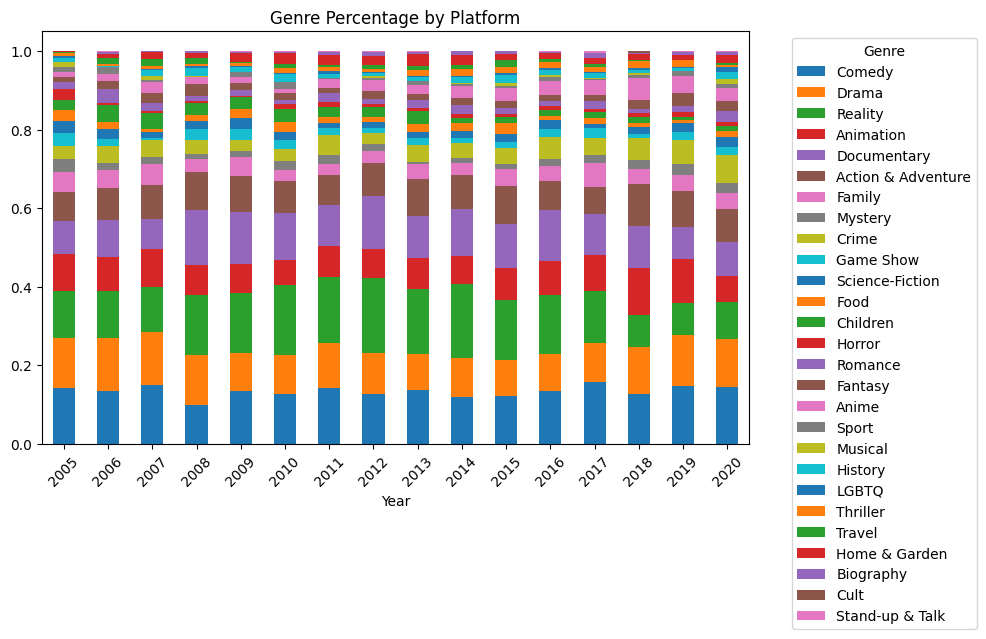

In [ ]:
# Plotting the genre percentages by platform
reordered_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Genre Percentage by Platform')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()